In [2]:
from agent import Agent
from trading_env import TradingEnv
from collections import deque
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/mohamedelgharbawy/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
WINDOW_SIZE = 160

agent = Agent(stock_size=WINDOW_SIZE, finance_size=29, action_size=1)
# TODO: Set up for every symbol
env = TradingEnv("AAPL", window_size=WINDOW_SIZE)
starting_amount = env.starting_amount
allowance = env.allowance_per_day

/Users/mohamedelgharbawy/Documents/Fall 2022/CS 285/rl-stock-predictor/src/trading_env.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.stock_history["Date"] = pd.to_datetime(self.stock_history["Date"])
/Users/mohamedelgharbawy/Documents/Fall 2022/CS 285/rl-stock-predictor/src/trading_env.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.company_history["Date"] = pd.to_datetime(self.company_history["period_end_date"])


In [4]:
def training(n_episodes=200, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.996):
    """Deep Q-Learning
    
    Params
    ======
        n_episodes (int): maximum number of training epsiodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon 
        eps_decay (float): mutiplicative factor (per episode) for decreasing epsilon
        
    """
    rewards = [] # list containing score from each episode
    rewards_window = deque(maxlen=100) # last 100 scores
    portfolio_values = []
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        portfolio_values.append(env.portfolio_value)
        stock_state, finance_state = env.reset()
        total_reward = 0
        for t in range(max_t):
            action = agent.act(stock_state, finance_state, eps)
            next_stock_state, next_finance_state, reward, done, _ = env.step(action)
            agent.step(stock_state, finance_state, action, reward, next_stock_state, next_finance_state, done)
            ## above step decides whether we will train(learn) the network
            ## actor (local_qnetwork) or we will fill the replay buffer
            ## if len replay buffer is equal to the batch size then we will
            ## train the network or otherwise we will add experience tuple in our 
            ## replay buffer.
            stock_state = next_stock_state
            finance_state = next_finance_state
            total_reward += reward
            if done:
                break
            rewards_window.append(total_reward)
            rewards.append(total_reward)
            eps = max(eps*eps_decay,eps_end)
            print('\rEpisode {}\tAverage Reward {:.2f}'.format(i_episode, np.mean(rewards_window)), end=" ")
                
    return rewards, portfolio_values

In [5]:
rewards, portfolio_values = training(n_episodes=50)

Episode 50	Average Reward 45992.03  

# Plot Rewards

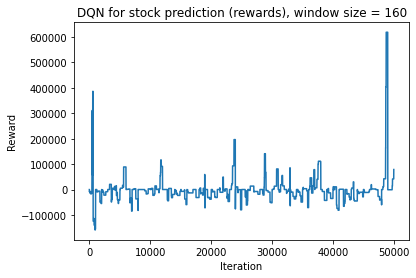

In [6]:
plt.plot(rewards)
plt.ylabel("Reward")
plt.xlabel("Iteration")
plt.title(f"DQN for stock prediction (rewards), window size = {WINDOW_SIZE}")
plt.show()

# Plot Portfolio Value

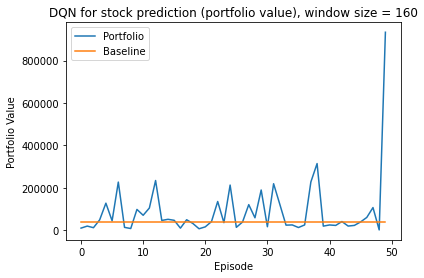

In [7]:
plt.plot(portfolio_values, label="Portfolio")
plt.plot([starting_amount + 1000*allowance for _ in range(50)], label="Baseline")
plt.legend()
plt.ylabel("Portfolio Value")
plt.xlabel("Episode")
plt.title(f"DQN for stock prediction (portfolio value), window size = {WINDOW_SIZE}")
plt.show()

In [9]:
np.mean(portfolio_values[:48])

72215.24903619952